### Preparing a raw BOSZ Grid installation ###

This is needed for making custom StarKit grids - not suitable for most users. 

You first need to navigate to the Phoenix folder that contains the grid ('bosz')

In [1]:
cd ~/data/skgrid/bosz/

/scigarfs/home/wkerzend/data/skgrid/bosz


In [2]:
from starkit.gridkit.io.phoenix import PhoenixProcessGrid
from starkit.gridkit.io.bosz.process import BOSZProcessGrid
from starkit.gridkit.io.bosz.base import make_raw_index, make_grid_info, cache_bosz_grid
from starkit.gridkit import load_grid
import pandas as pd
from astropy import units as u
from astropy.io import fits
import numpy as np
import uuid

In [3]:
#make_grid_info('bosz_grid_info.h5')

In [4]:
#cache_bosz_grid()

In [5]:
meta = pd.read_hdf('bosz_grid_info.h5', 'meta')
raw_index = pd.read_hdf('bosz_grid_info.h5', 'index')
wavelength = pd.read_hdf('bosz_grid_info.h5', 'wavelength')[0].values * u.Unit(meta['wavelength_unit'])

In [43]:
for col in raw_index.columns[:-1]:
    raw_index[col] = raw_index[col].astype(np.float64)
raw_index.logg *= 0.1

In [47]:
index_filter = (raw_index.teff.between(4000, 7000) &
 raw_index.logg.between(-1, 5) &
 raw_index.mh.between(-2.5, 0.5) &
 (raw_index.alpha == 0.0))

new_index = raw_index.loc[index_filter]

In [54]:
bgrid = BOSZProcessGrid(new_index, wavelength, meta, 
                           wavelength_start=2000*u.angstrom, 
                           wavelength_stop=25000*u.angstrom, R=20000.0)

In [55]:
bgrid.to_hdf('rcw86_fs1_bosz_grid.h5')

100% (10530 of 10530) |###################| Elapsed Time: 0:07:47 Time: 0:07:47


done


/lustre/home/wkerzend/miniconda3/envs/starkit/lib/python2.7/site-packages/pandas/core/generic.py:1299: PerformanceWarning: 
your performance may suffer as PyTables will pickle object types that it cannot
map directly to c-types [inferred_type->mixed-integer,key->values] [items->None]

  return pytables.to_hdf(path_or_buf, key, self, **kwargs)


In [8]:
raw_index.drop('filename', axis=1)

,teff,logg,mh,alpha
0,2300,0,0.5,0
1,2300,0.5,0.5,0
2,2300,1,0.5,0
3,2300,1.5,0.5,0
4,2300,2,0.5,0
5,2300,2.5,0.5,0
6,2300,3,0.5,0
7,2300,3.5,0.5,0
8,2300,4,0.5,0
9,2300,4.5,0.5,0


In [13]:
flux = fits.getdata('PHOENIX-ACES-AGSS-COND-2011/Z+0.5/lte02300-0.00+0.5.PHOENIX-ACES-AGSS-COND-2011-HiRes.fits')

Populating the interactive namespace from numpy and matplotlib


/Users/wkerzend/anaconda3/envs/starkit/lib/python2.7/site-packages/matplotlib/__init__.py:1035: UserWarning: Duplicate key in file "/Users/wkerzend/.matplotlib/stylelib/talk_default.mplstyle", line #33
  (fname, cnt))
/Users/wkerzend/anaconda3/envs/starkit/lib/python2.7/site-packages/matplotlib/__init__.py:1035: UserWarning: Duplicate key in file "/Users/wkerzend/.matplotlib/stylelib/talk_default.mplstyle", line #39
  (fname, cnt))
/Users/wkerzend/anaconda3/envs/starkit/lib/python2.7/site-packages/matplotlib/__init__.py:1035: UserWarning: Duplicate key in file "/Users/wkerzend/.matplotlib/stylelib/talk_default.mplstyle", line #40
  (fname, cnt))


<IPython.core.display.Javascript object>


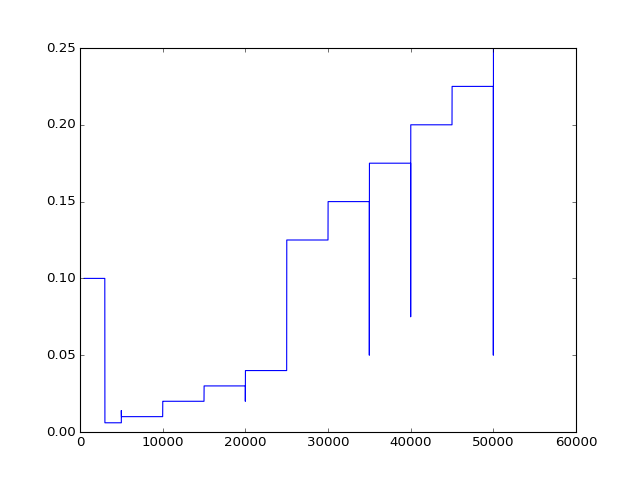

In [10]:
%pylab notebook

plot(wavelength[1:], np.diff(wavelength))